In [1]:
!pip  install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import collections as Counter 

In [3]:
#import the dataset
Con_Chu = pd.read_csv('Customer-Churn - Customer-Churn.csv')

In [4]:
Con_Chu.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
Con_Chu.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
Con_Chu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#see the number of customer that left to the number we have loyal
Con_Chu['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

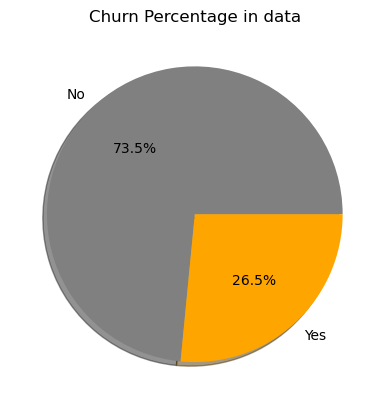

In [8]:
# Plotting target feature distribution
count = Con_Chu['Churn'].value_counts(sort = True)
colors = ["grey","orange"] 
labels=['No','Yes']
#plotting pie chart
plt.pie(count,labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)
plt.title('Churn Percentage in data')
plt.show()

In [9]:
#find out number of missing data
Con_Chu_data = Con_Chu.copy()
Con_Chu_data.TotalCharges = pd.to_numeric(Con_Chu_data.TotalCharges, errors='coerce')
Con_Chu_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#check the missing value index
Con_Chu_data.loc[Con_Chu_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
#Remove missing data, since he propotion of missing data to toatl data set is low
Con_Chu_data.dropna(how = 'any', inplace = True)

In [12]:
Con_Chu_data.TotalCharges = pd.to_numeric(Con_Chu_data.TotalCharges, errors='coerce')
Con_Chu_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
#convert tenure data into catgories monthly 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
Con_Chu_data['tenure_group'] = pd.cut(Con_Chu_data.tenure, range(1, 80, 12), right=False, labels=labels)
Con_Chu_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

Analysis: Observe the influence of various feature on the effect of churning

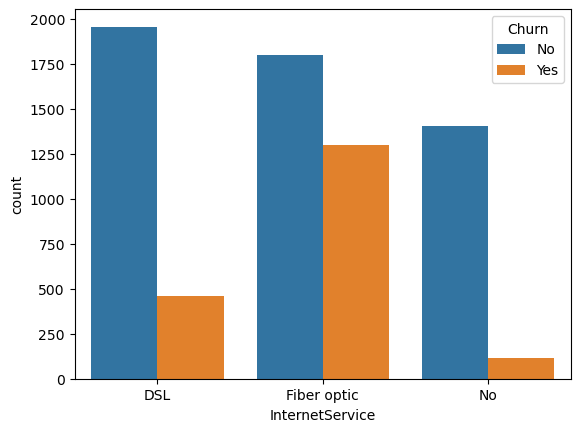

In [14]:

sns.countplot(x ='InternetService', hue = "Churn", data = Con_Chu_data);

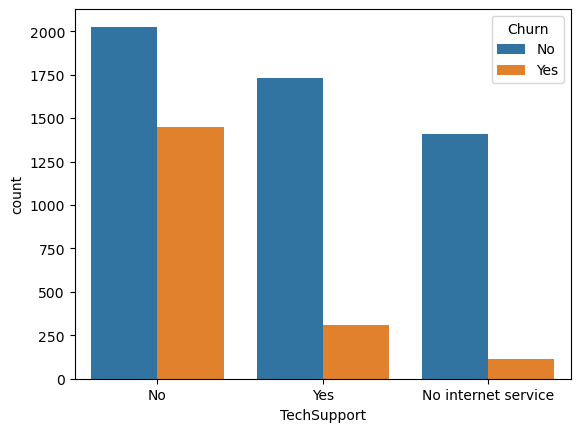

In [15]:
sns.countplot(x ='TechSupport', hue = "Churn", data = Con_Chu_data);

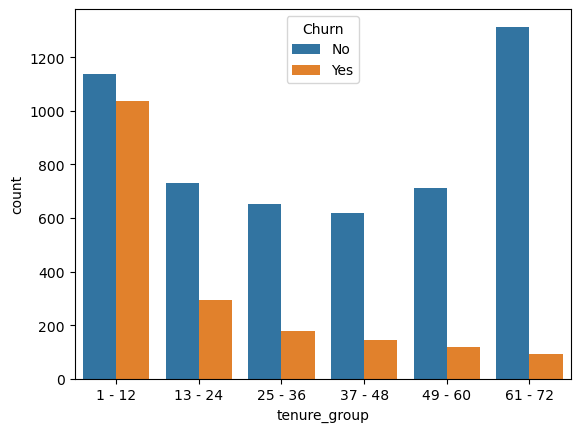

In [16]:
sns.countplot(x ='tenure_group', hue = "Churn", data = Con_Chu_data);


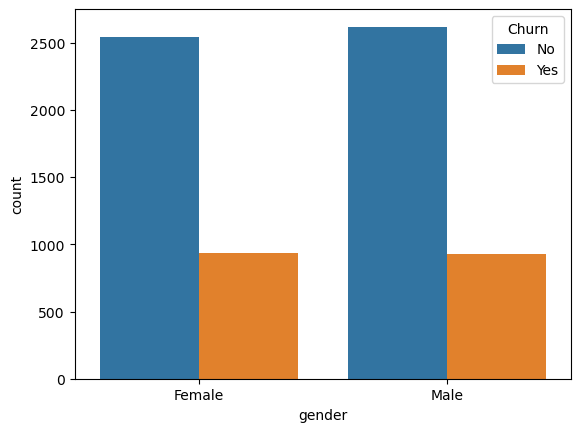

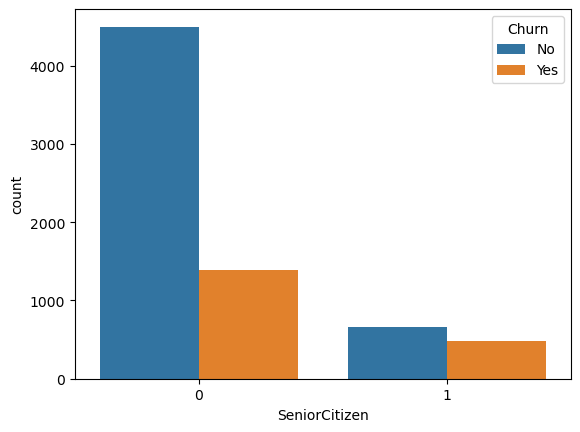

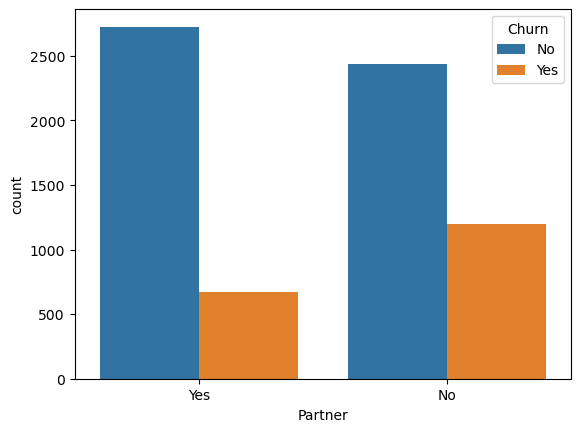

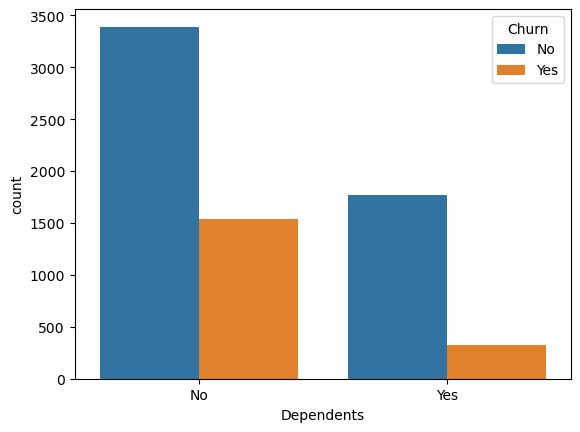

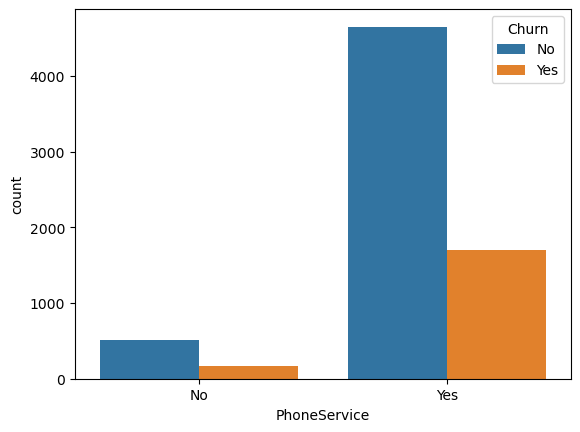

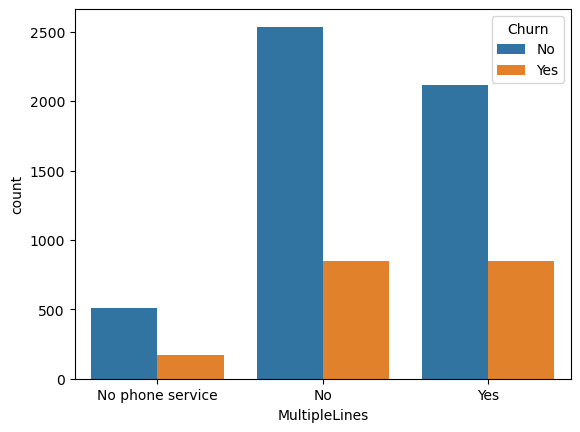

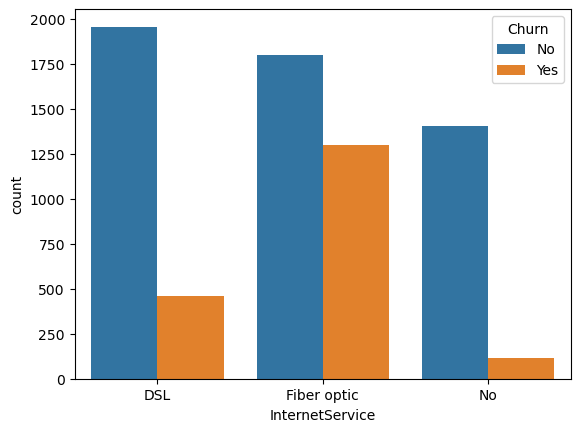

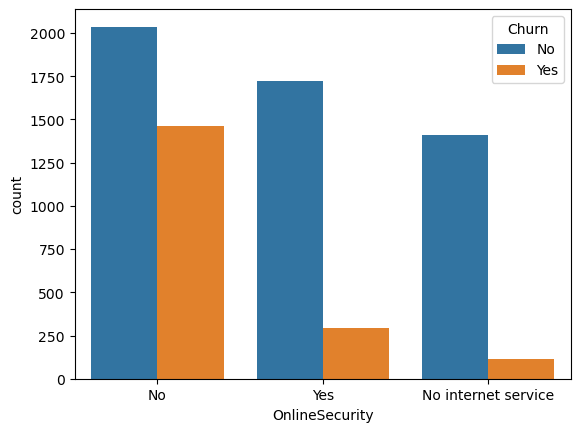

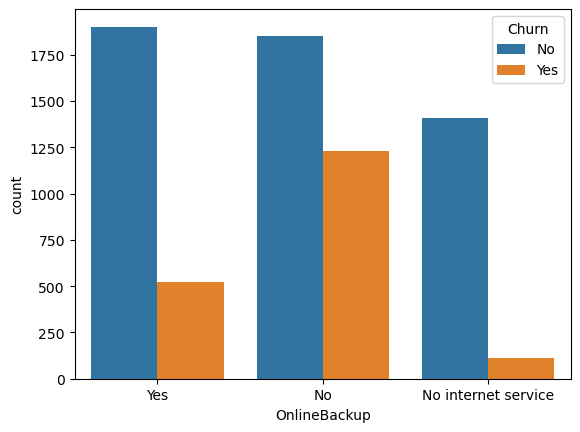

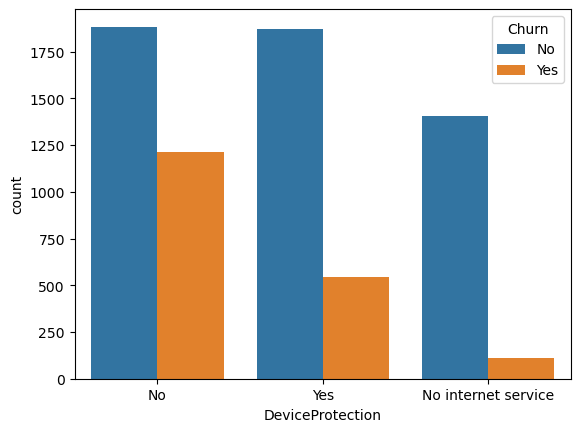

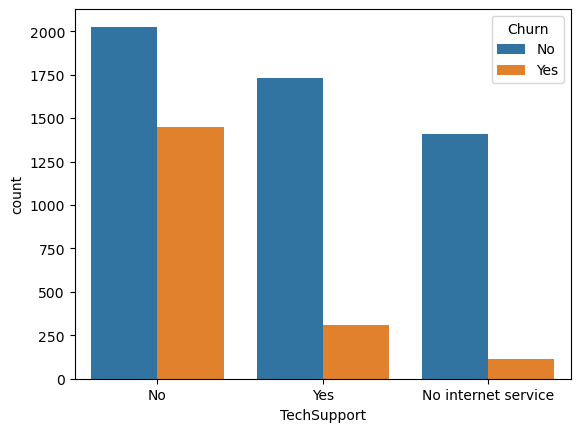

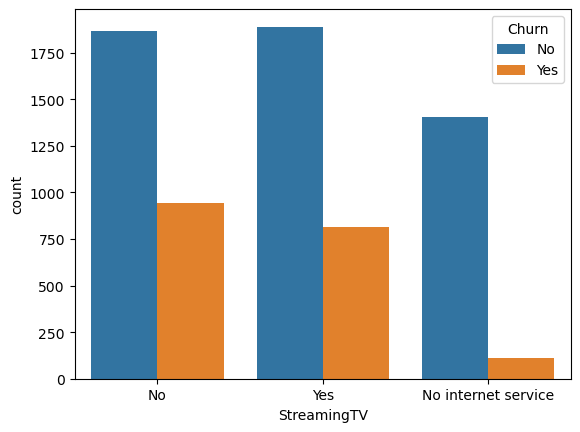

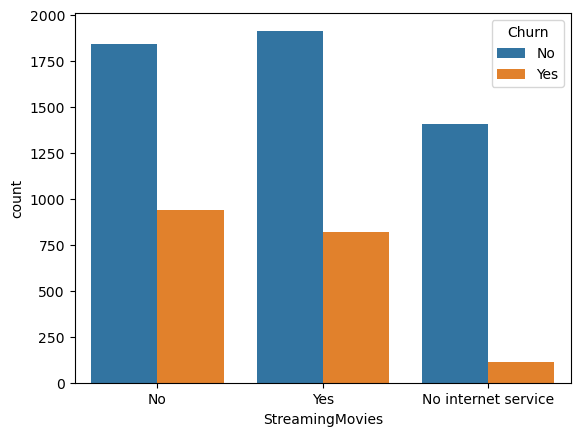

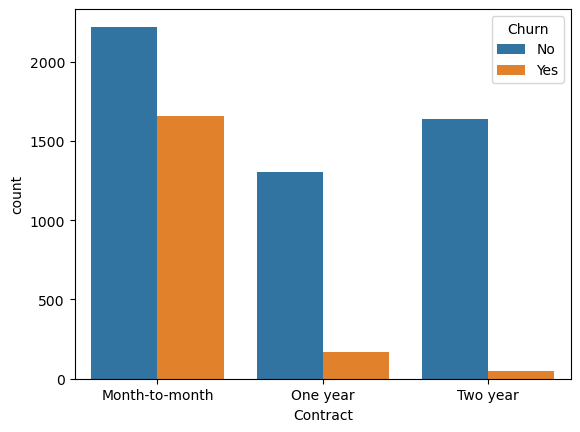

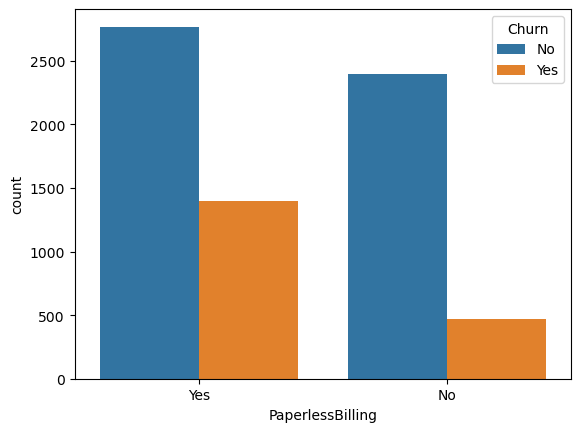

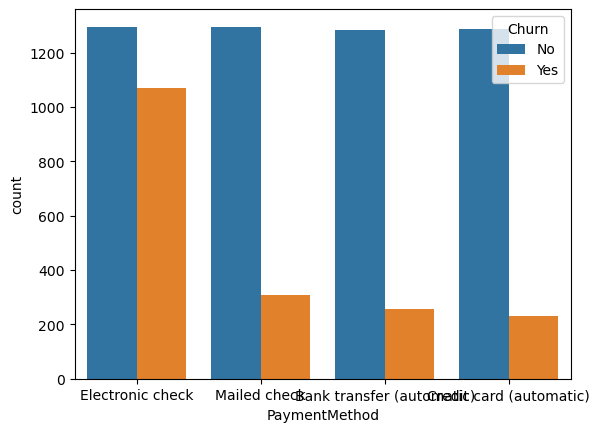

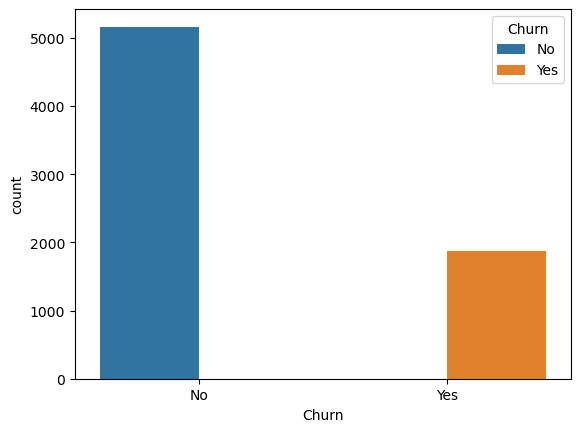

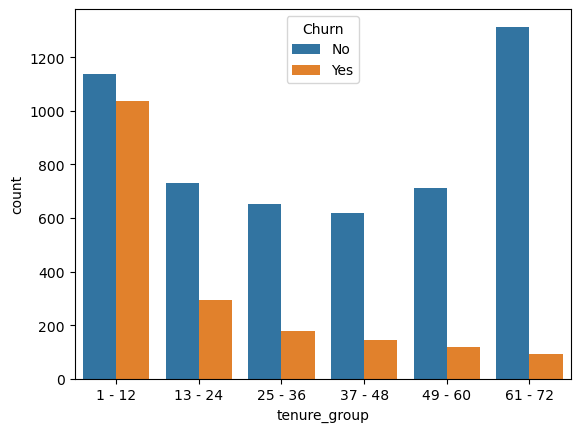

In [17]:
for i, predictor in enumerate(Con_Chu_data.drop(columns=['TotalCharges','MonthlyCharges','customerID','tenure'])):
    plt.figure(i)
    sns.countplot(data=Con_Chu_data, x=predictor, hue='Churn')

In [18]:
#Import dictionaries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [22]:
Con_Chu.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Data Modeling and Traning

In [23]:
!pip install scikit-learn --upgrade --quiet

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ADELANI FAITH\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#Split data to test, train data and validation data
train_val_df, test_df = train_test_split(Con_Chu_data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [26]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (4218, 22)
val_df.shape : (1407, 22)
test_df.shape : (1407, 22)


In [27]:
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
540,6859-QNXIQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.10,8248.50,No,61 - 72
4865,1355-KUSBG,Female,0,Yes,Yes,7,Yes,Yes,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,48.80,349.80,No,1 - 12
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1 - 12
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No,13 - 24
6551,6728-VOIFY,Female,0,Yes,No,63,Yes,No,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Electronic check,96.00,6109.75,No,61 - 72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,8707-RMEZH,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,...,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,No,61 - 72
2738,2351-BKRZW,Female,0,Yes,Yes,43,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Bank transfer (automatic),75.20,3254.35,No,37 - 48
3125,5222-JCXZT,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.00,78.90,No,1 - 12
1641,5980-BDHPY,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),87.10,6230.10,No,61 - 72


In [28]:
val_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
6053,0057-QBUQH,Female,0,No,Yes,43,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Electronic check,25.10,1070.15,No,37 - 48
2456,5968-HYJRZ,Male,0,Yes,Yes,47,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,24.55,1160.45,No,37 - 48
6421,2999-AANRQ,Female,0,No,No,21,Yes,No,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),71.05,1524.85,No,13 - 24
5668,0147-ESWWR,Female,1,Yes,No,39,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,101.25,3949.15,No,37 - 48
2854,4644-PIZRT,Male,0,Yes,Yes,17,Yes,Yes,DSL,Yes,...,No,Yes,No,One year,Yes,Bank transfer (automatic),70.35,1201.65,No,13 - 24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,0181-RITDD,Male,0,Yes,Yes,62,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Mailed check,108.15,6825.65,No,61 - 72
3262,5498-TXHLF,Female,0,Yes,Yes,34,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,No,Electronic check,87.45,2874.15,Yes,25 - 36
5053,4828-FAZPK,Female,0,Yes,Yes,16,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),79.95,1267.95,No,13 - 24
661,8095-WANWK,Female,0,No,No,10,Yes,No,DSL,No,...,No,No,No,Month-to-month,No,Mailed check,45.25,428.70,No,1 - 12


In [29]:
test_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2481,6614-YWYSC,Male,1,Yes,No,61,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75,No,61 - 72
6784,9546-KDTRB,Female,0,No,No,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No,13 - 24
6125,0871-URUWO,Male,0,Yes,No,13,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359.00,Yes,13 - 24
3052,5151-HQRDG,Male,0,Yes,No,37,Yes,Yes,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No,37 - 48
4099,6624-JDRDS,Female,0,No,No,6,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,1015-OWJKI,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.05,19.05,No,1 - 12
5250,3338-CVVEH,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,No,Electronic check,94.55,1173.55,No,1 - 12
5465,6933-FHBZC,Female,0,No,No,26,Yes,No,DSL,No,...,No,No,No,One year,Yes,Mailed check,56.05,1553.20,No,25 - 36
5851,4118-CEVPF,Female,1,No,No,35,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.80,3836.30,No,25 - 36


In [30]:
#Let's create a list of input columns, and also identify the target column.
input_cols = list(train_df.columns)[1:-1]
target_col = 'Churn'

In [31]:
print(input_cols)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [32]:
target_col

'Churn'

In [33]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [34]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [35]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [36]:
train_inputs

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
540,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),113.10,8248.50,No
4865,Female,0,Yes,Yes,7,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,48.80,349.80,No
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
6551,Female,0,Yes,No,63,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,96.00,6109.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,No
2738,Female,0,Yes,Yes,43,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),75.20,3254.35,No
3125,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.00,78.90,No
1641,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),87.10,6230.10,No


In [37]:
train_targets

540      No
4865     No
5       Yes
11       No
6551     No
       ... 
3616     No
2738     No
3125     No
1641     No
1743     No
Name: Churn, Length: 4218, dtype: object

Identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [38]:
import numpy as np

In [39]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [40]:
train_inputs[numeric_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4218.000000,4218.000000,4218.000000,4218.000000
mean,0.153864,32.703177,64.653924,2302.030856
std,0.360861,24.751870,30.261165,2288.583078
min,0.000000,1.000000,18.250000,18.850000
25%,0.000000,9.000000,35.050000,391.900000
50%,0.000000,29.000000,70.350000,1405.650000
75%,0.000000,56.000000,89.950000,3854.462500
max,1.000000,72.000000,118.750000,8684.800000


In [41]:
#Check the cataegorical data
train_inputs[categorical_cols].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [42]:
#check if we have missing values in numericl data
Con_Chu_data[numeric_cols].isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

SCALING NUMERIC FEATURES

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
scaler.fit(Con_Chu_data[numeric_cols])

MinMaxScaler()

In [46]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[0.0, 1.0, 18.25, 18.8]

In [47]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[1.0, 72.0, 118.75, 8684.8]

SCALE TRANIN VALIDATION AND TEST DATA

In [48]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [49]:
train_inputs[numeric_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4218.000000,4218.000000,4218.000000,4218.000000
mean,0.153864,0.446524,0.461731,0.263470
std,0.360861,0.348618,0.301106,0.264088
min,0.000000,0.000000,0.000000,0.000006
25%,0.000000,0.112676,0.167164,0.043053
50%,0.000000,0.394366,0.518408,0.160033
75%,0.000000,0.774648,0.713433,0.442610
max,1.000000,1.000000,1.000000,1.000000


ENCODING CATEGORICAL COLOUMS

In [50]:
Con_Chu_data[categorical_cols].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [54]:
encoder.fit(Con_Chu_data[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [55]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [56]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'Payment

In [57]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [59]:
pip install -U scikit-learn

In [61]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'Payment

In [62]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [63]:
#verify that these new columns have been added to our training, test and validation sets.
pd.set_option('display.max_columns', None)

In [64]:
test_inputs

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
2481,Male,1.0,Yes,No,0.845070,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0.067164,0.171123,No,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6784,Female,0.0,No,No,0.253521,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),0.064179,0.051587,No,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6125,Male,0.0,Yes,No,0.169014,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),0.835821,0.154650,Yes,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3052,Male,0.0,Yes,No,0.507042,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,0.366169,0.232166,No,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4099,Female,0.0,No,No,0.070423,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),0.111443,0.016461,No,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Male,0.0,No,No,0.000000,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0.007960,0.000029,No,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5250,Male,0.0,No,No,0.154930,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,0.759204,0.133251,No,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5465,Female,0.0,No,No,0.352113,Yes,No,DSL,No,Yes,Yes,No,No,No,One year,Yes,Mailed check,0.376119,0.177060,No,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,

Save DAta
It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [65]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (4218, 63)
train_targets: (4218,)
val_inputs: (1407, 63)
val_targets: (1407,)
test_inputs: (1407, 63)
test_targets: (1407,)


In [66]:
!pip install pyarrow --quiet

In [67]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [68]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: total: 15.6 ms
Wall time: 15.4 ms


In [69]:
#Read save data
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: total: 547 ms
Wall time: 677 ms


Let's verify that the data was loaded properly.

In [70]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (4218, 63)
train_targets: (4218,)
val_inputs: (1407, 63)
val_targets: (1407,)
test_inputs: (1407, 63)
test_targets: (1407,)


In [71]:
val_inputs

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
6053,Female,0.0,No,Yes,0.591549,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic check,0.068159,0.121319,No,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2456,Male,0.0,Yes,Yes,0.647887,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.062687,0.131739,No,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6421,Female,0.0,No,No,0.281690,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic),0.525373,0.173788,No,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5668,Female,1.0,Yes,No,0.535211,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0.825871,0.453537,No,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2854,Male,0.0,Yes,Yes,0.225352,Yes,Yes,DSL,Yes,No,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),0.518408,0.136493,No,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,Male,0.0,Yes,Yes,0.859155,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,0.894527,0.785466,No,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3262,Female,0.0,Yes,Yes,0.464789,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,0.688557,0.329489,Yes,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5053,Female,0.0,Yes,Yes,0.211268,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0.613930,0.144144,No,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
661,Female,0.0,No,

In [72]:
val_targets

6053     No
2456     No
6421     No
5668     No
2854     No
       ... 
2021     No
3262    Yes
5053     No
661      No
270     Yes
Name: Churn, Length: 1407, dtype: object

TRAINIG A LOGISTIC REGRESSION MODEL

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
model = LogisticRegression(solver='liblinear')

In [75]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [76]:
print(numeric_cols + encoded_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit 

In [77]:
print(model.coef_.tolist())

[[0.09190698652054162, -0.44893456579462526, 0.027722340436863113, -0.1806900317311893, -0.055663655581617705, -0.05229421845403713, -0.022235514294341365, -0.0857223597413123, 0.010633019669522539, -0.1185908937051776, -0.024349222232618956, -0.08360865180302382, -0.06389536837432341, -0.024349222232618956, -0.019713283428711245, -0.19372898178465173, 0.17257099880093413, -0.08679989105193713, 0.08498118425490811, -0.08679989105193713, -0.10613916723862644, 0.028176879269813427, -0.08679989105193713, -0.04933486225353191, -0.00854833301073344, -0.08679989105193713, -0.012609649972981932, 0.08894640569685322, -0.08679989105193713, -0.11010438868057243, -0.05276482819158686, -0.08679989105193713, 0.03160684520786932, -0.05625922643797847, -0.08679989105193713, 0.035101243454260064, 0.3168038479496665, -0.11257998080271193, -0.31218174118260883, -0.11976523872823056, 0.011807364692579278, -0.07184940712266982, -0.08166049035698089, 0.11069184068760071, -0.06513981724360708, -5.6099939607

In [78]:
print(model.intercept_)

[-0.10795787]


MAKING PREDICTIONS AND EVALUATING THE MODEL

In [79]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [80]:
train_preds = model.predict(X_train)

In [81]:
train_preds

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [82]:
train_targets

540      No
4865     No
5       Yes
11       No
6551     No
       ... 
3616     No
2738     No
3125     No
1641     No
1743     No
Name: Churn, Length: 4218, dtype: object

PROBABILISTIC PREDICTION OUTPUT

In [83]:
train_probs = model.predict_proba(X_train)
train_probs

array([[9.99164586e-01, 8.35414181e-04],
       [9.97319665e-01, 2.68033456e-03],
       [2.34518315e-03, 9.97654817e-01],
       ...,
       [9.98382199e-01, 1.61780106e-03],
       [9.99315092e-01, 6.84907796e-04],
       [9.99457070e-01, 5.42929706e-04]])

In [84]:
model.classes_

array(['No', 'Yes'], dtype=object)

Test the accuracy of the model's predictions by computing the percentage of matching values in train_preds and train_targets.

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(train_targets, train_preds)

1.0

The model achieves an accuracy of 100% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

In [87]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[1., 0.],
       [0., 1.]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [90]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 100.00%


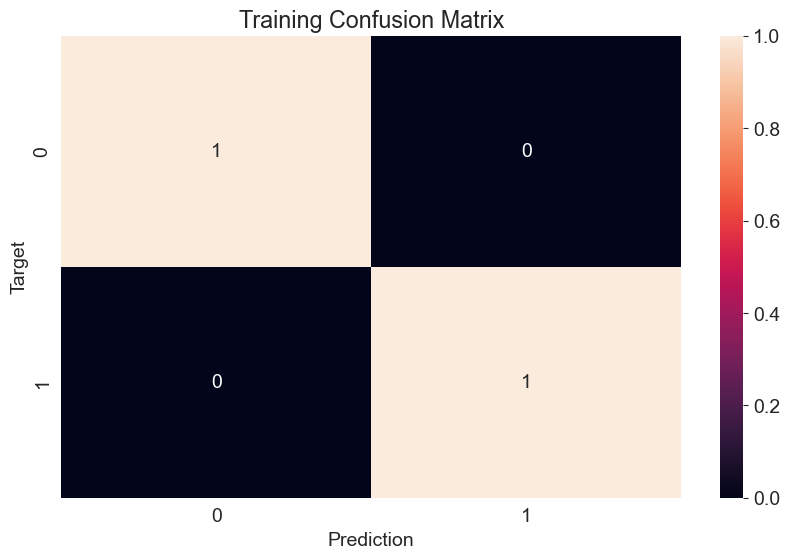

In [91]:
Train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 100.00%


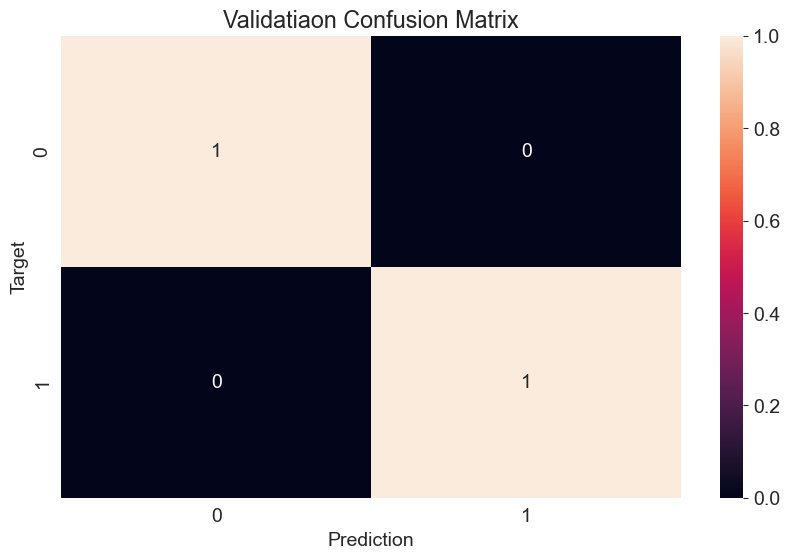

In [92]:
#MODEL ACCURACCY ON VALIDATION AND TEST DATA
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 100.00%


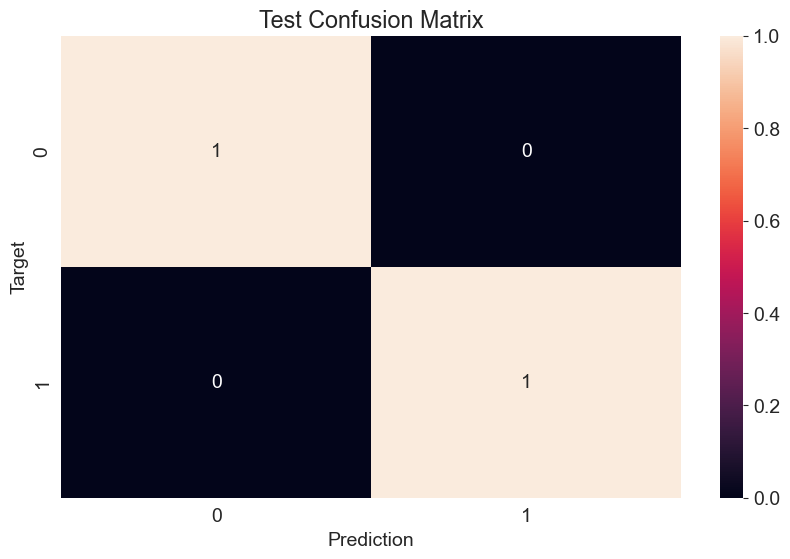

In [93]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

CREATE TWO MODELS THAT GUESSES RANDOMLY AND ANOTHER THAT ALWAYS RETURN NO

In [94]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [95]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [96]:
#CHECK ACCURACY
accuracy_score(test_targets, random_guess(X_test))

0.4939587775408671

In [97]:
accuracy_score(test_targets, all_no(X_test))

0.7341862117981521

random model achieves an accuracy of 49% and our "always No" model achieves an accuracy of 73%

Define a helper function to make predictions for individual inputs

In [98]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

SAVING AND LOADING TRAINING MODELS

In [99]:
import joblib

In [101]:
#CREATE DICTONARIES
aussie_rain = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [103]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [104]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [105]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

1.0

The same result as the original model